# **SÉRIES TEMPORAIS - TAXA DE CÂMBIO USD**

Vamos utilizar uma função do Python para ler dados da API de Séries Temporais do Banco Central.

<img src='https://github.com/ClarisseAlvarenga/lives_twitch/blob/master/BCB/imagem.PNG?raw=true' alt='tela de pesquisa Bacen'>

Para pesquisar, basta acessar o Site do Banco Central, em sua seção de [Estatísticas](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries) e determinar o código da série a ser estudada. Nesta live, vamos analisar a Taxa de Câmbio para o Dólar Americano

In [1]:
#!pip install pmdarima

In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels as sm
import scipy as scp
import pmdarima as pmd

In [3]:
# criar uma função para consumir a API do Banco Central usando o código da série temporal como argumento
def bcb(codigo):
  """
  Esta é uma função para capturar dados em JSON da API do Banco Central e retornar um DataFrame:
  Parâmetros: Código (int) - um número inteiro representativo do código da série temporal no 
  site https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries 

  Processos: Acessa a API do BACEN, faz a leitura do arquivo JSON, transforma a coluna "data" em datetime, 
  redefine a coluna data como index e gera um dataframe com o index e a coluna valor da série escolhida

  Retorna: DataFrame do Pandas.

  Pré-Requisitos: importar o Pandas
  """
  link_bcb = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
  df = pd.read_json(link_bcb)
  # redefinindo index
  df.index = pd.to_datetime(df['data'], dayfirst=True)
  df = df[['valor']]
  return df

In [14]:
#criando uma função de plot comparativo
def plot_comparacao(x, y1, y2,y3, dataset,titulo):
  """
  Cria um plot comparativo de séries temporais em 3 lineplots.
  Uso indicado: Comparação entre série temporal, aumento e aceleração
  Parâmetros: x = série de datas
  y1 = Série de valores
  y2 = série de valores para comparação
  y3 = série de valores para comparação
  dataset = um DataFrame preferencialmente do Pandas
  titulo = Título do Gráfico
  """
  plt.figure(figsize=(10,8))
  ax = plt.subplot(3,1,1) #3 linhas, um gráfico por linha
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data = dataset)
  ax=ax

In [4]:
cdi = bcb(12)
cdi.head()


,valor
data,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222


In [5]:
cambio = bcb(1)
cambio.head()

,valor
data,
1984-11-28,2828.0
1984-11-29,2828.0
1984-11-30,2881.0
1984-12-03,2881.0
1984-12-04,2881.0


In [6]:
#buscando apenas as taxas para o real
cambio_real = cambio[cambio.index >= '1994-07-01']
cambio_real.head()

,valor
data,
1994-07-01,1.000
1994-07-04,0.940
1994-07-05,0.932
1994-07-06,0.915
1994-07-07,0.910


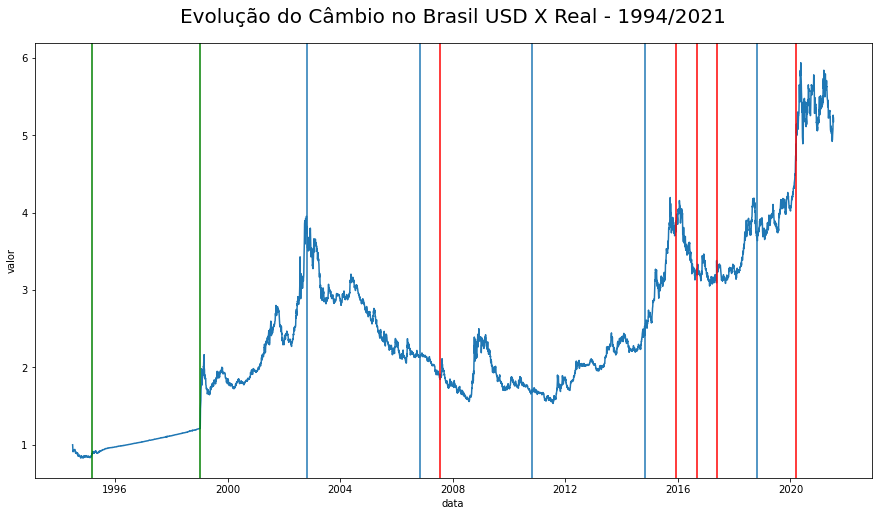

In [12]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x=cambio_real.index, y=cambio_real['valor'])
ax.set_title('Evolução do Câmbio no Brasil USD X Real - 1994/2021', fontsize=20, pad=20)
#bandas Cambiais
plt.axvline(dt.datetime(1995,3,6), color='g')
plt.axvline(dt.datetime(1999,1,15), color='g')
#Eleições
plt.axvline(dt.datetime(2002,10,27))
plt.axvline(dt.datetime(2006,10,29))
plt.axvline(dt.datetime(2010,10,31))
plt.axvline(dt.datetime(2014,10,26))
plt.axvline(dt.datetime(2018,10,28))
#Crises
plt.axvline(dt.datetime(2007,7,24), color='r') #crise subprimes
plt.axvline(dt.datetime(2015,12,2), color='r') #impeachment Dilma
plt.axvline(dt.datetime(2016,8,31), color='r') #impeachment Dilma
plt.axvline(dt.datetime(2017,5,17), color='r') #Joesley day
plt.axvline(dt.datetime(2020,3,16), color='r'); #lockdown

In [8]:
# exportar planilha .xlsx
#cdi.to_excel('/content/drive/MyDrive/00_Adglow/cdi.xlsx')

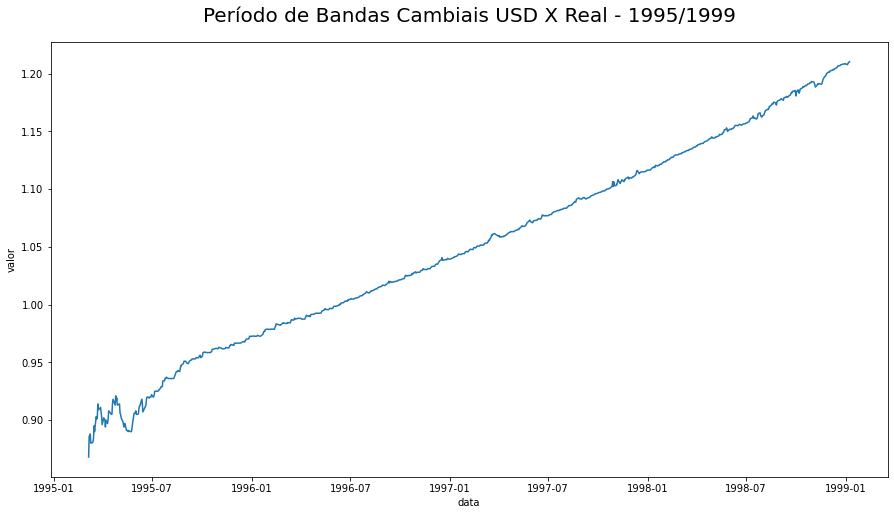

In [9]:
#período de bandas cambiais
bandas = cambio[cambio.index >= '1995-03-06']
bandas = bandas[bandas.index < '1999-01-10']
plt.figure(figsize=(15,8))
ax = sns.lineplot(x=bandas.index, y=bandas['valor'])
ax.set_title('Período de Bandas Cambiais USD X Real - 1995/1999', fontsize=20, pad=20);



Analisando o Segundo Mandato da Dilma - Impeachment e Período Temer

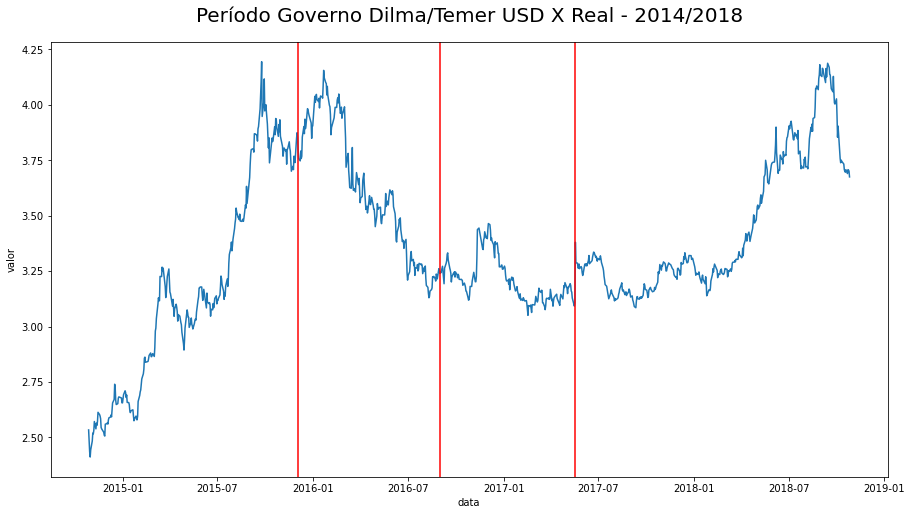

In [10]:
dilma = cambio[cambio.index >= '2014-10-26' ]
dilma = dilma[dilma.index < '2018-10-28']
plt.figure(figsize=(15,8))
ax = sns.lineplot(x=dilma.index, y=dilma['valor'])
ax.set_title('Período Governo Dilma/Temer USD X Real - 2014/2018', fontsize=20, pad=20)
plt.axvline(dt.datetime(2015,12,2), color='r') #impeachment Dilma
plt.axvline(dt.datetime(2016,8,31), color='r') #impeachment Dilma
plt.axvline(dt.datetime(2017,5,17), color='r'); #Joesley day

In [11]:
dilma[dilma['valor'] == dilma['valor'].max()]

,valor
data,
2015-09-24,4.1949


In [13]:
#Analisando o aumento e a aceleração do câmbio
cambio_real['aumento'] = cambio_real['valor'].diff()
cambio_real['aceleracao'] = cambio_real['aumento'].diff()
cambio_real.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,valor,aumento,aceleracao
data,,,
1994-07-01,1.000,NaN,NaN
1994-07-04,0.940,-0.060,NaN
1994-07-05,0.932,-0.008,0.052
1994-07-06,0.915,-0.017,-0.009
1994-07-07,0.910,-0.005,0.012


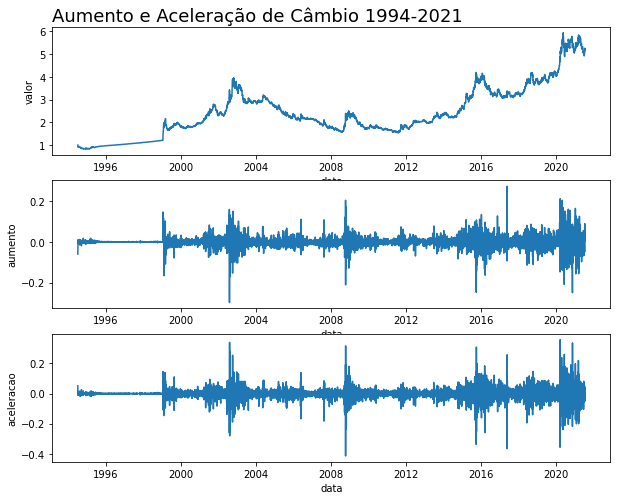

In [15]:
plot_comparacao(cambio_real.index, 'valor', 'aumento', 'aceleracao', cambio_real, 'Aumento e Aceleração de Câmbio 1994-2021')

Calculando a Média Móvel de 5/10 e 22 dias (úteis)

In [18]:
#calculada através da função rolling.mean
#calculando a média de 5 em 5 pontos
media_movel_5 = pd.DataFrame(cambio_real['valor'].rolling(5).mean())
media_movel_10 = pd.DataFrame(cambio_real['valor'].rolling(10).mean())
media_movel_22 = pd.DataFrame(cambio_real['valor'].rolling(22).mean())

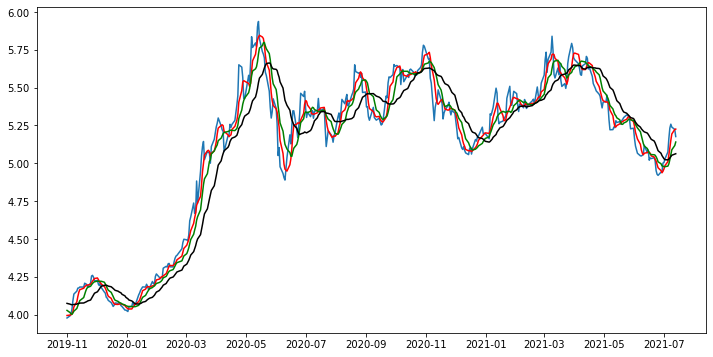

In [22]:
plt.figure(figsize=(12,6))
#gráfico original
plt.plot(cambio_real.index[6360:], cambio_real['valor'][6360:])
#gráfico com a média móvel 5 aplicada
plt.plot(media_movel_5.index[6360:], media_movel_5['valor'][6360:], 'r')
#gráfico com a média móvel 7 aplicada
plt.plot(media_movel_10.index[6360:], media_movel_10['valor'][6360:], 'g')
#gráfico com a média móvel 21 aplicada
plt.plot(media_movel_22.index[6360:], media_movel_22['valor'][6360:], 'k')
plt.show()

In [20]:
cambio_real.shape

(6784, 3)

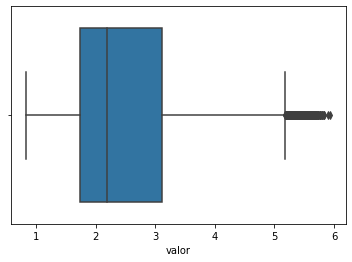

In [29]:
#vendo a variação cambial do período em um boxplot
sns.boxplot(x=cambio_real['valor']);

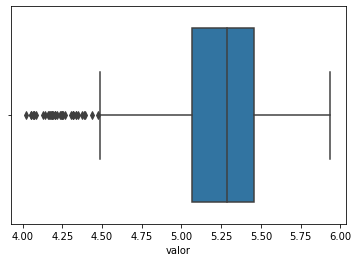

In [38]:
#pós lockdown
sns.boxplot(x=cambio_real[cambio_real.index.year == 2020]['valor']);

In [37]:
anos = list(set(cambio_real.index.year))

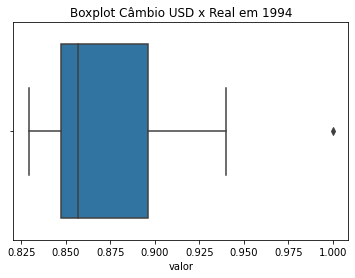

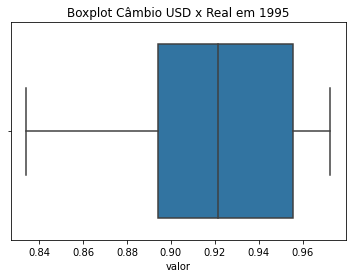

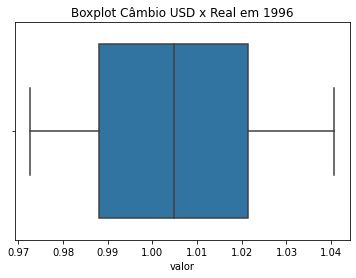

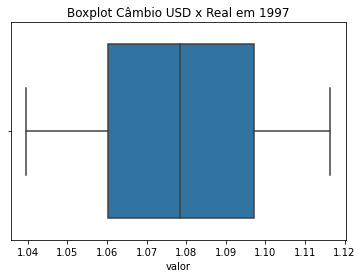

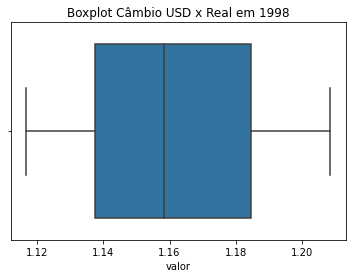

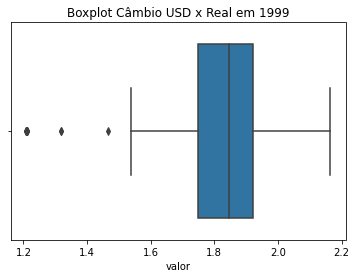

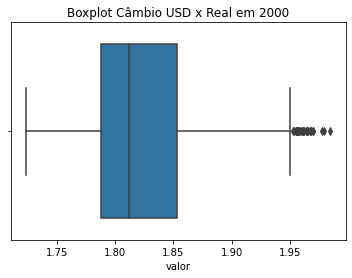

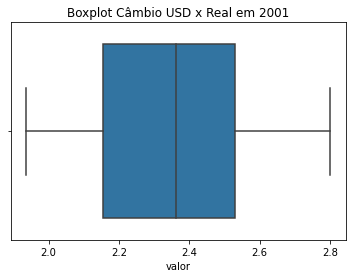

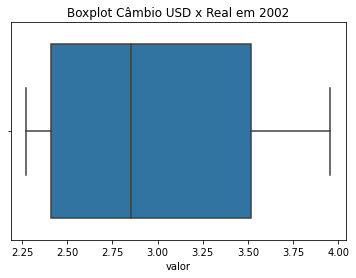

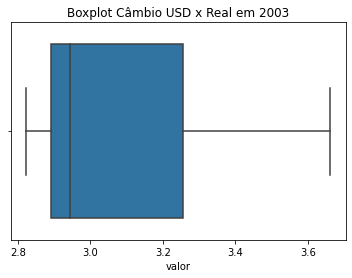

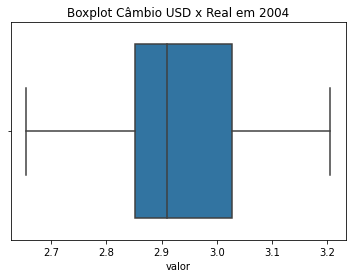

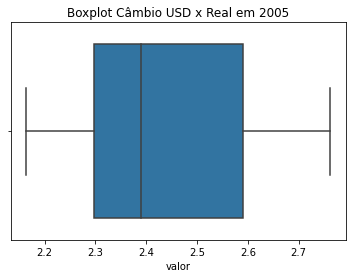

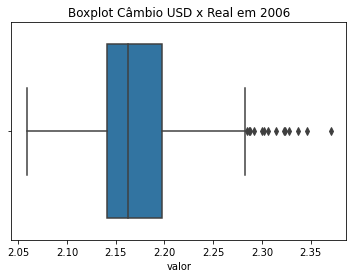

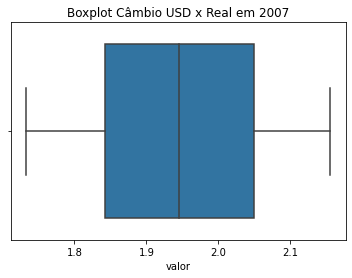

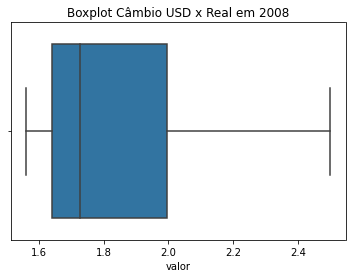

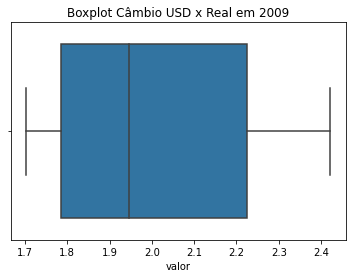

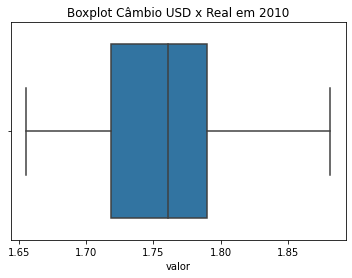

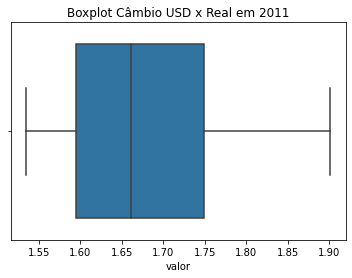

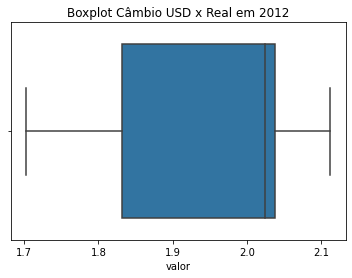

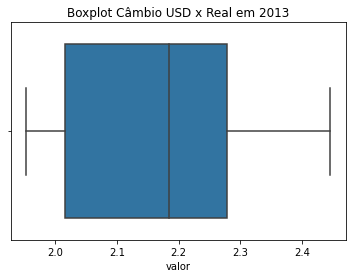

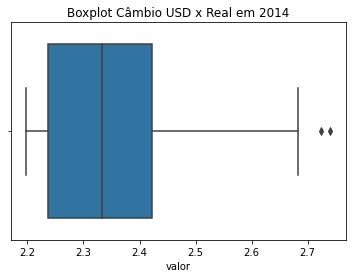

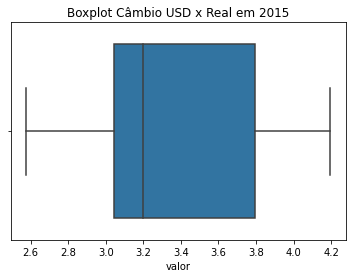

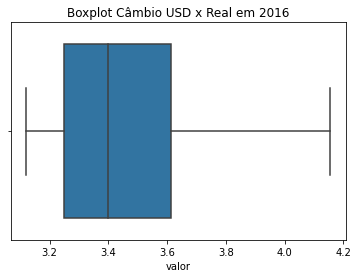

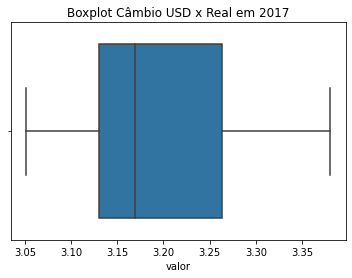

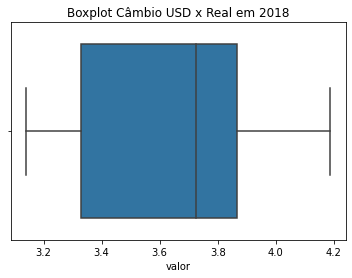

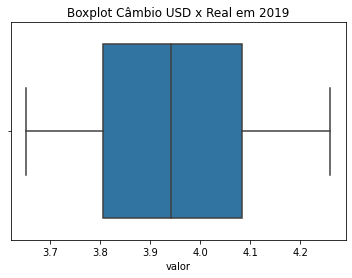

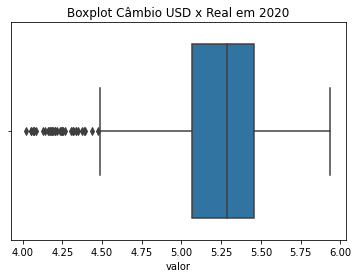

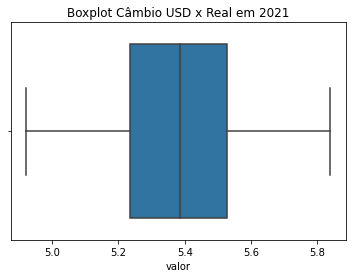

In [41]:
for ano in anos:
  sns.boxplot(x=cambio_real[cambio_real.index.year == ano]['valor'])
  plt.title(f'Boxplot Câmbio USD x Real em {ano}')
  plt.show();

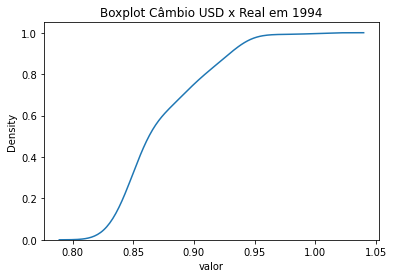

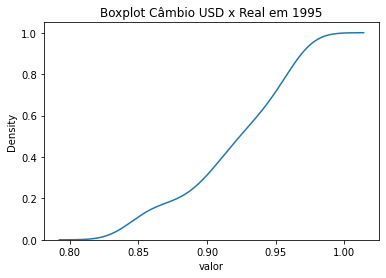

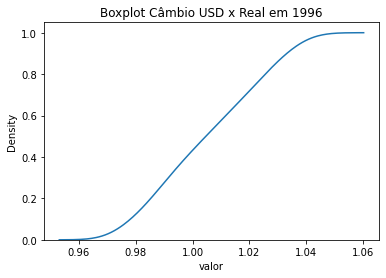

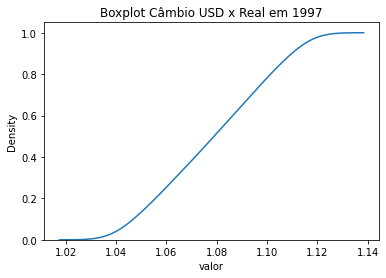

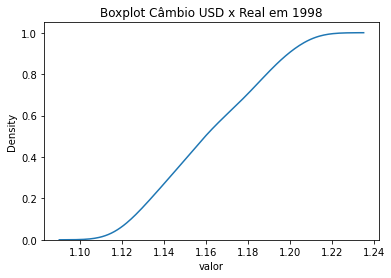

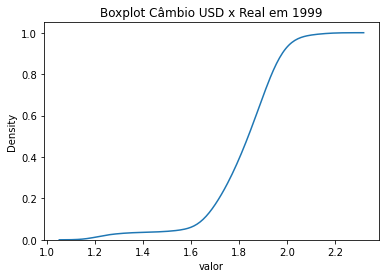

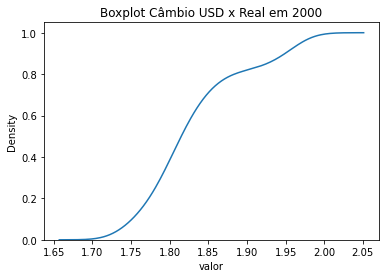

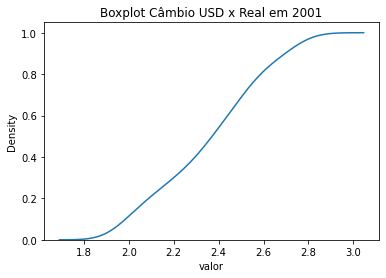

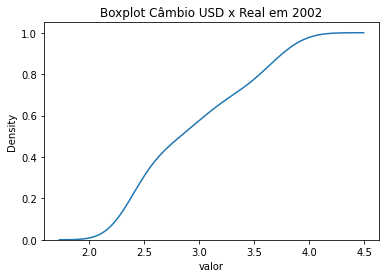

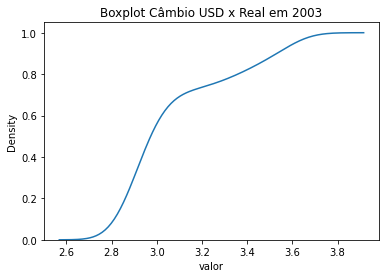

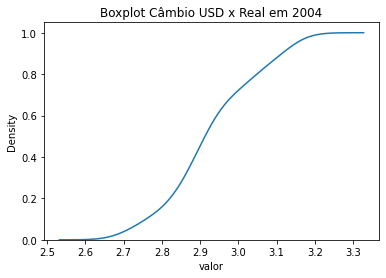

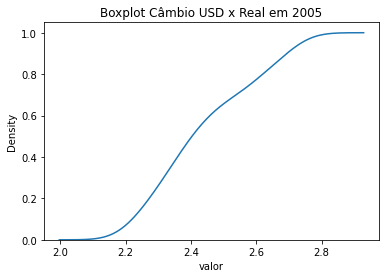

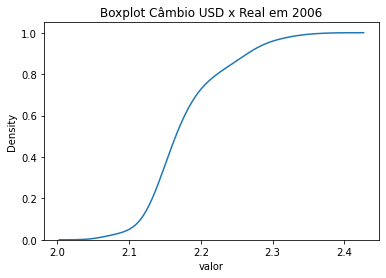

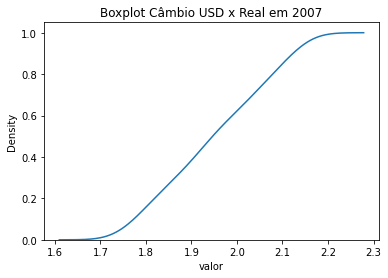

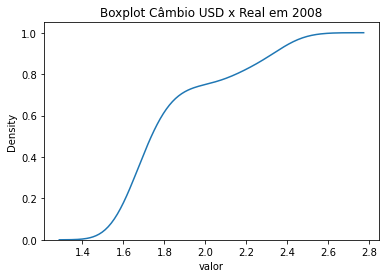

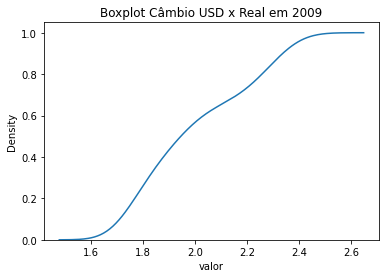

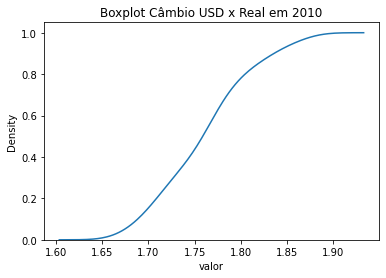

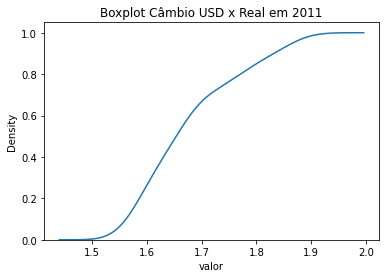

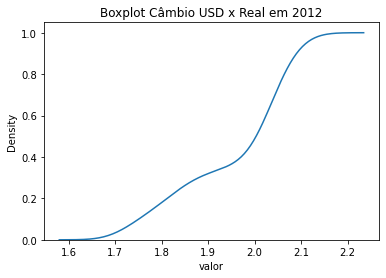

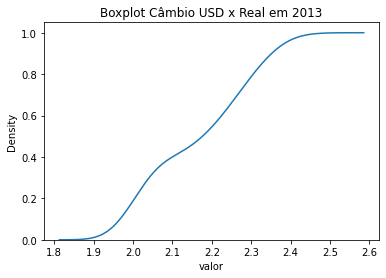

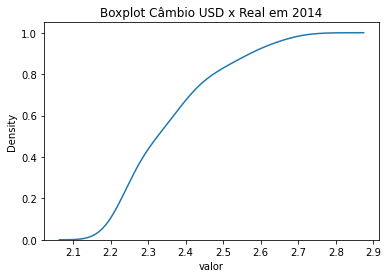

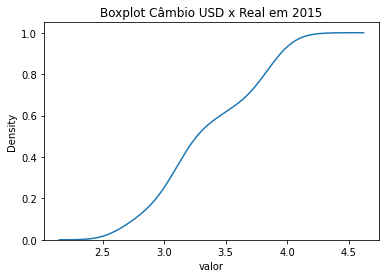

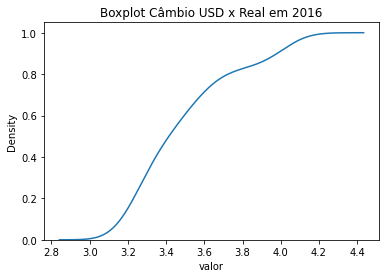

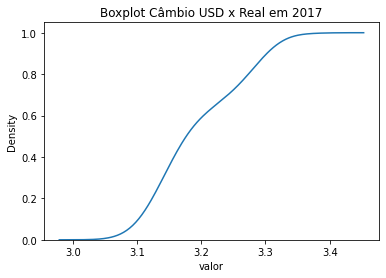

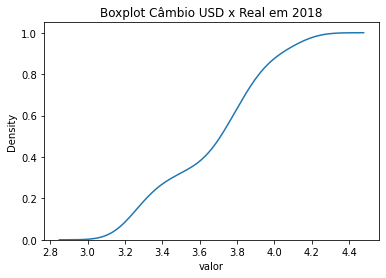

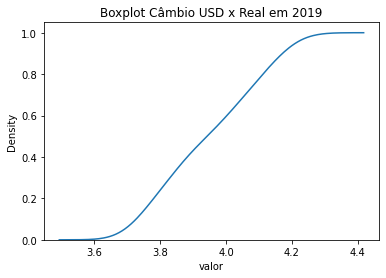

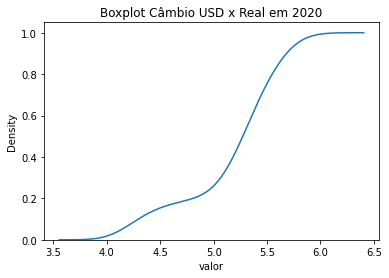

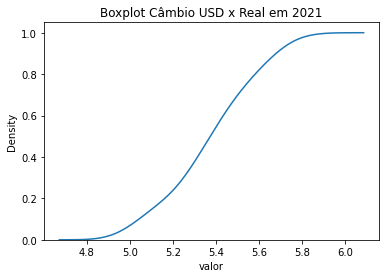

In [44]:
for ano in anos:
  sns.kdeplot(x=cambio_real[cambio_real.index.year == ano]['valor'], cumulative=True)
  plt.title(f'Boxplot Câmbio USD x Real em {ano}')
  plt.show();

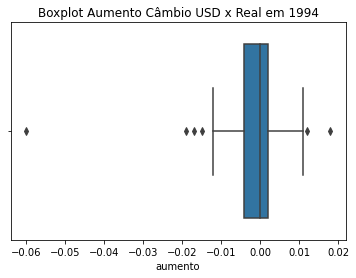

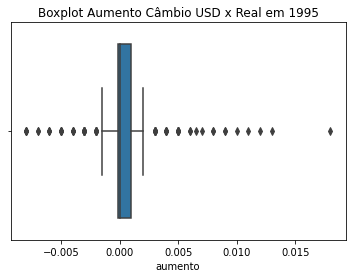

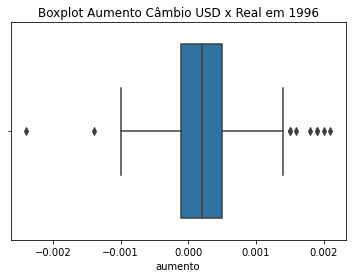

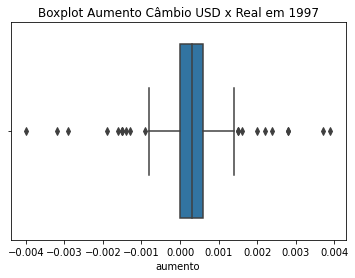

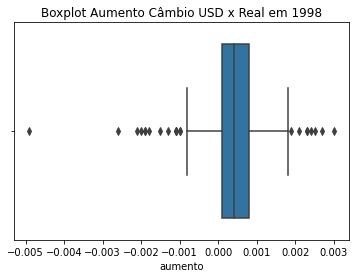

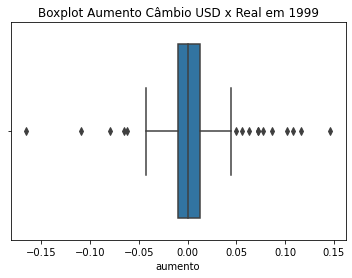

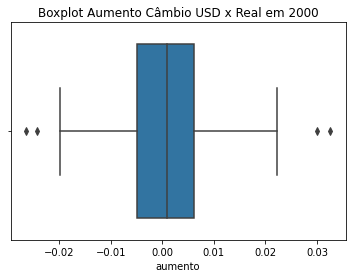

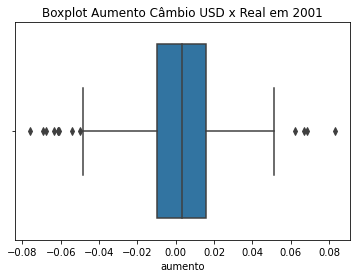

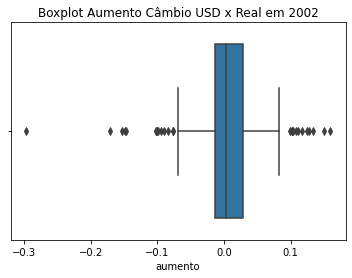

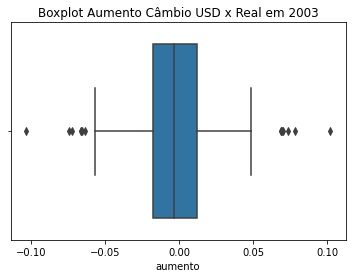

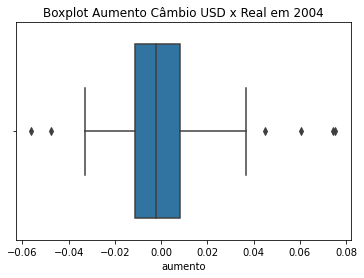

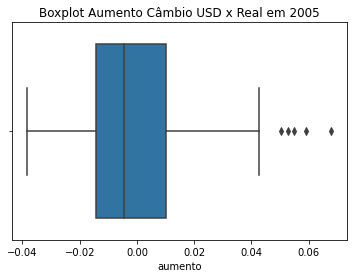

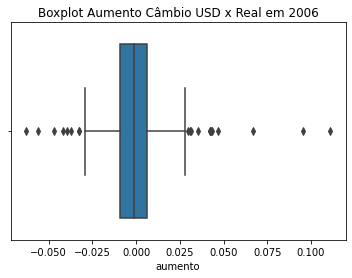

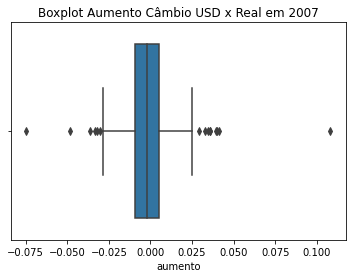

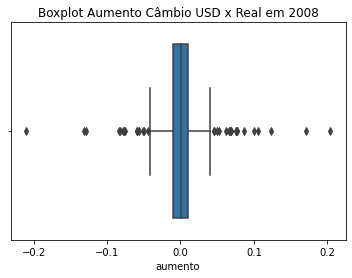

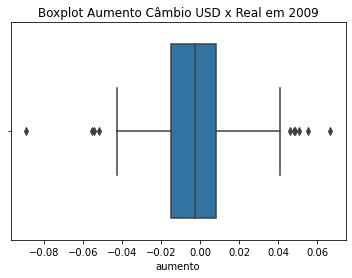

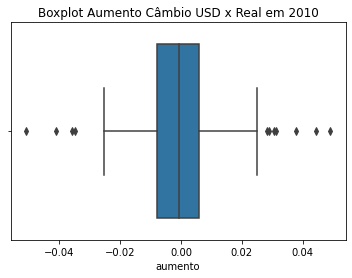

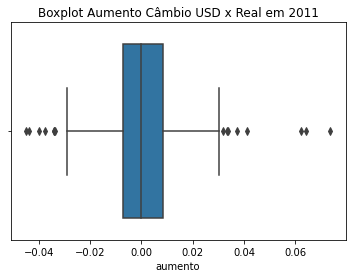

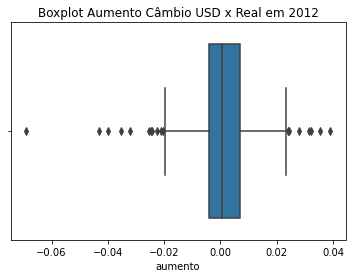

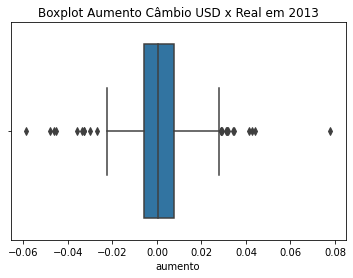

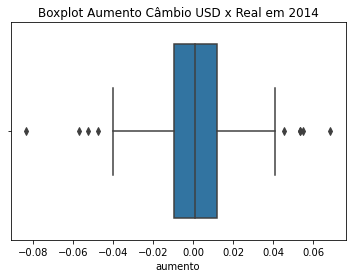

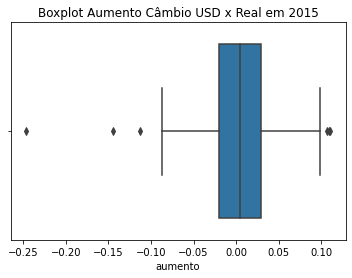

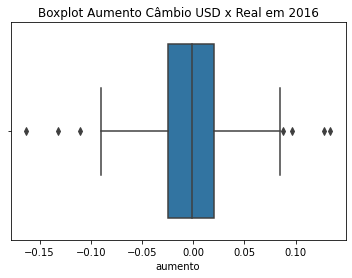

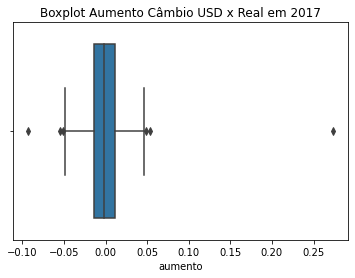

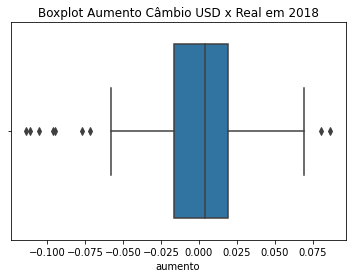

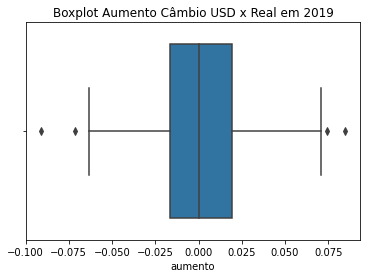

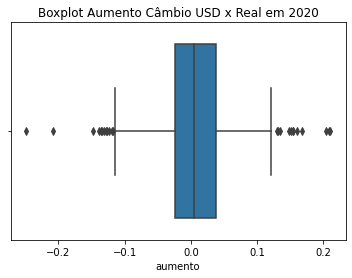

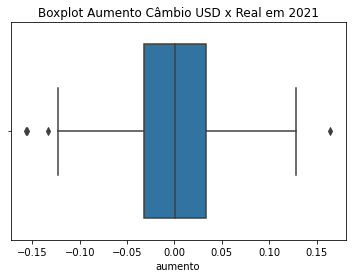

In [45]:
for ano in anos:
  sns.boxplot(x=cambio_real[cambio_real.index.year == ano]['aumento'])
  plt.title(f'Boxplot Aumento Câmbio USD x Real em {ano}')
  plt.show();

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decompondo os dados do total em tendência, sazonalidade e ruído
result_c = seasonal_decompose(cambio_real[cambio_real.index.year > 2020]['valor'],period=22)

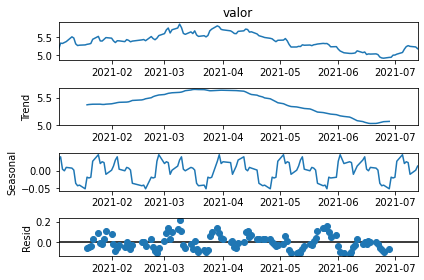

In [57]:
result_c.plot();

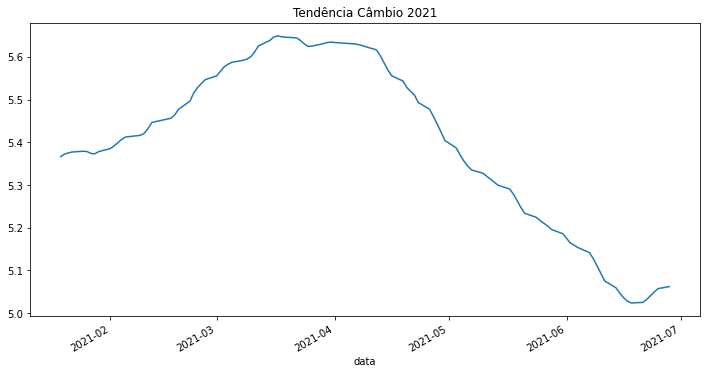

In [61]:
plt.figure(figsize=(12,6))
result_c.trend.plot()
plt.title('Tendência Câmbio 2021');

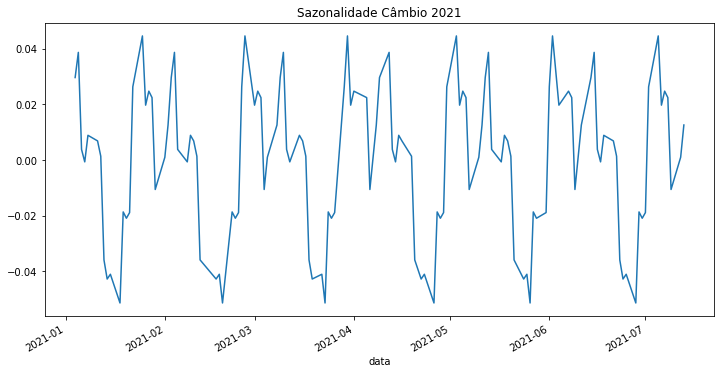

In [62]:
plt.figure(figsize=(12,6))
result_c.seasonal.plot()
plt.title('Sazonalidade Câmbio 2021');

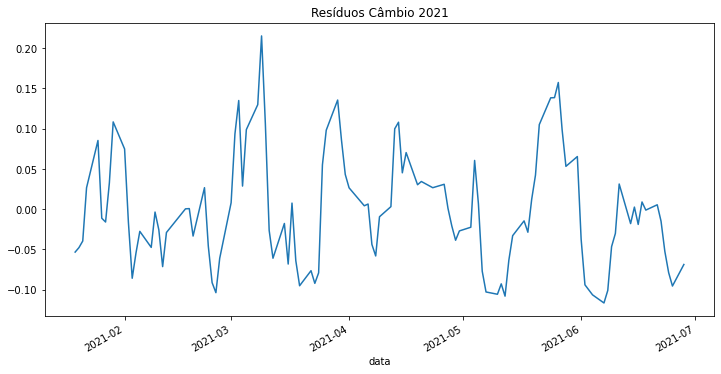

In [63]:
plt.figure(figsize=(12,6))
result_c.resid.plot()
plt.title('Resíduos Câmbio 2021');

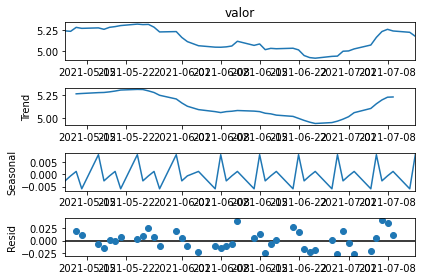

In [66]:
#decompondo os dados do total em tendência, sazonalidade e ruído
result_c = seasonal_decompose(cambio_real[cambio_real.index > '2021-05-10']['valor'],period=5)
result_c.plot();

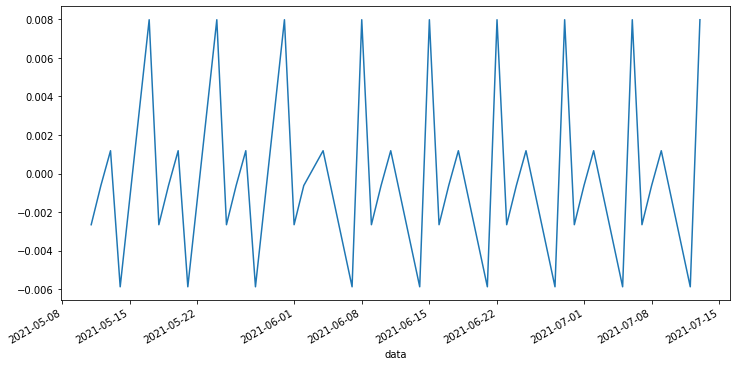

In [68]:
plt.figure(figsize=(12,6))
result_c.seasonal.plot();

In [79]:
cambio_3anos = cambio_real[cambio_real.index.year >= 2019][['valor', 'aumento']]

In [80]:
cambio_3anos

,valor,aumento
data,,
2019-01-02,3.8595,-0.0153
2019-01-03,3.7683,-0.0912
2019-01-04,3.7627,-0.0056
2019-01-07,3.7062,-0.0565
2019-01-08,3.7208,0.0146
...,...,...
2021-07-07,5.2328,0.0683
2021-07-08,5.2587,0.0259
2021-07-09,5.2393,-0.0194


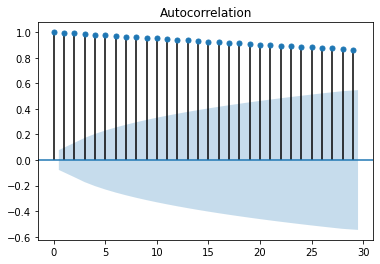

In [81]:
#rodando a autocorrelação dos valores
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#usando a função do statsmodels para autocorrelação. 
#alta sazonalidade se reflete em valores altos
#o cone azul define o intervalo de confiança
plot_acf(cambio_3anos['valor']);

Testando a Estacionariedade

In [73]:
divide = int(len(cambio_3anos)/2)
#cria um vetor com os valores das médias diárias
x = cambio_3anos['valor'].values
#dividindo em dois vetores
#usando desempacotamento de tuplas
c1, c2 = x[0:divide], x[divide:]
#calculando a média da primeira metade
#uma variação entre as duas médias indica a não estacionariedade dos dados
print('Médias')
print(c1.mean(),c2.mean())
#calculando a variância
#uma grande variação entre as duas variância indica a não estacionariedade dos dados
print('Variâncias')
print(c1.var(), c2.var())
#calculando o desvio padrão
print('Desvios Padrão')
print(c1.std(), c2.std())

Médias
4.059888050314465 5.379995597484277
Variâncias
0.10066411350500375 0.04515031998061785
Desvios Padrão
0.31727608404196456 0.21248604655510406


Calculando Estacionariedade com AdFuller (Augmented Dickey-Fuller)

A Hipótese Nula deste teste é que há uma unidade raiz.

In [75]:
from statsmodels.tsa.stattools import adfuller

In [83]:
x = cambio_3anos['valor']
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print("usedlag: %f" % result[2])
print('Critical Values:') 
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.334968
p-value: 0.613026
usedlag: 1.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


Primeiramente vamos usar o teste de Dickey Fuller, usarei o valor P base de 5%, ou seja, caso o valor P esteja abaixo desses 5% significa que a série é estatisticamente estacionária. Além disso, existe o Teste estatístico do modelo, onde estes valores podem ser comparados com os valores críticos de 1%, 5% e 10%, caso o teste estatístico esteja abaixo de algum valor critico escolhido a série será estacionária.

[Fonte](hhttps://medium.com/ensina-ai/princ%C3%ADpios-b%C3%A1sicos-para-criar-previs%C3%B5es-de-s%C3%A9ries-temporais-e58c451a25b)

Rejeitar a hipótese nula seria que o resultado do seu teste t -1.334968 é menor do que todos os valores críticos (1%, 5%, 10%) que, neste caso, não é menor do que seus valores críticos.

Transformando a série temporal em série temporal estacionária

In [77]:
from pmdarima.arima import ndiffs

In [82]:
#calculando quantos diffs temos de rodar
ndiffs(cambio_3anos['valor'])

1

In [84]:
#já temos uma série com um diff, então vamos testar a estacionariedade dela
x = cambio_3anos['aumento']
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print("usedlag: %f" % result[2])
print('Critical Values:') 
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.648037
p-value: 0.000000
usedlag: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


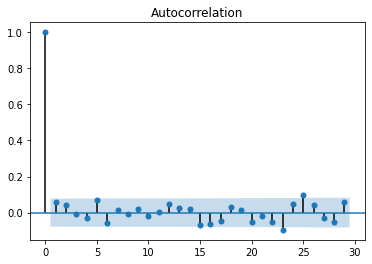

In [85]:
#usando a função do statsmodels para autocorrelação. 
#alta sazonalidade se reflete em valores altos
#o cone azul define o intervalo de confiança
plot_acf(cambio_3anos['aumento']);

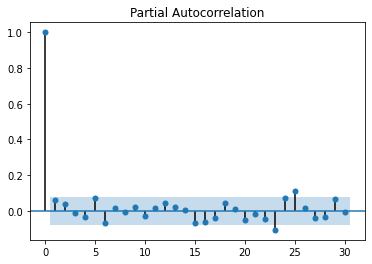

In [88]:
#Plotando a Autocorrelação parcial
plot_pacf(cambio_3anos['aumento'], lags=30);

In [89]:
cambio_3anos.shape

(636, 2)

In [90]:
treino = cambio_3anos['aumento'][1:600]
teste = cambio_3anos['aumento'][600:]

Tentando fazer previsão com Auto Regressão

In [93]:
from statsmodels.tsa.ar_model import AutoReg

In [94]:
#criando uma lista de um a 40 de um em um
lista = np.linspace(1,30,30)

In [95]:
#usando a função AutoReg do statsmodels
modelo_ajustado = AutoReg(treino.values, lags = lista, trend='c', seasonal = False, period=5).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [96]:
previsto = modelo_ajustado.predict(start=600, end=636)

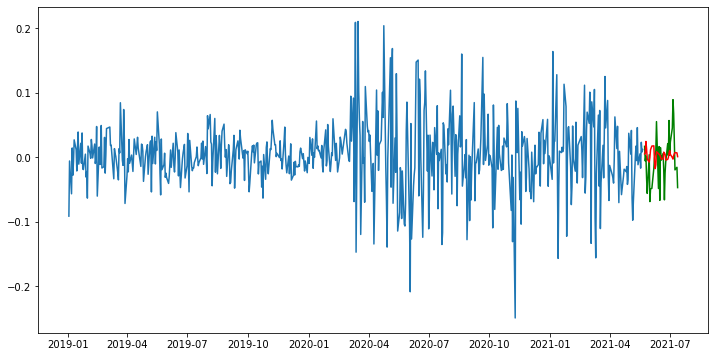

In [98]:
#gerando a imagem
plt.figure(figsize=(12,6))
plt.plot(treino)
plt.plot(teste, 'g')
plt.plot(teste.index, previsto[1:], 'r')
plt.show()